<a href="https://colab.research.google.com/github/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/blob/main/Notebooks/Desenvolvimento_do_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Bootcamp Data Science Alura - Projeto Final </font>

# <font color= MediumSpringGreen		size = 6>
Previsão da admissão na UTI:
Um modelo de Machine Learning a partir de dados dos pacientes do Hospital Sírio Libanês </font>

2º Notebook

Elaborado por [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

Data: 18/02/2022

### <font color= MediumSpringGreen> Importando bibliotecas

Importarei as bibliotecas necessárias, configuradas no "requirements.txt" do projeto.

Devido outra versão do matplotlib, será necessário restartar o ambiente após a desisntalação da versão pré instalada no colab.


In [1]:
!pip install wget
import wget

wget.download('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/main/requirements.txt', 'requirements.txt')

'requirements (1).txt'

In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.datasets import load_digits

from numpy.ma import MaskedArray
import sklearn.utils.fixes

sklearn.utils.fixes.MaskedArray = MaskedArray

from skopt import BayesSearchCV

from joblib import dump, load


### <font color= MediumSpringGreen> Funções

Importarei o notebook com todas as funções necessárias para o projeto, criadas neste [notebook](https://github.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/blob/main/Notebooks/Notebook_de_Funcoes.ipynb)

In [4]:
wget.download('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/main/Notebooks/notebook_de_funcoes.py', 'funcoes.py')

'funcoes.py'

In [5]:
import funcoes as f

## <font color= MediumSpringGreen> Importação dos dados

In [6]:
dados = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/main/Dados/dados_sem_valores_unicos.csv')

## <font color= MediumSpringGreen> 1. Treinamento e desenvolvimento do modelo


Escolhi 3 algoritmos para realizar o treinamento e desenvolvimento do modelo:

*   [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

*   [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

*   [Ramdom Florest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)


Baseado no artigo de [Subudhi et al (2021)](https://doi.org/10.1038/s41746-021-00456-x)

No qual tiveram as melhores métricas de F1 score.

A partir deles, realizarei os treinos e melhorarei os parâmetros.

Para cada algoritmo, criarei rodarei ele e verificarei o AUC com a tabela de classificação de "precision", "recall" e "f1-score". 
Para cada um também rodarei o modelo 50 vezes e mostrarei  valor do AUC médio e seu intervalo de mínimo e máximo.

O algoritmo que tive o mairo AUC médio será o escolhido para promover os hiperparâmetros.

### <font color= MediumSpringGreen> 1.1 Treinamento e testes iniciais

Verificarei os índices de AUC para cada modelo e entenderei qual será o melhor para otimizar os hiperparâmetros e desenvolver o modelo.


#### <font color= MediumSpringGreen> 1.1.1  BaggingClassifier


In [7]:
modelo_bagging = BaggingClassifier()

Rodarei o modelo nos dados e printarei os resultados.

In [8]:
f.roda_modelo(modelo_bagging,dados)

AUC 0.8642241379310346

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.84      0.67      0.74        24

    accuracy                           0.79        53
   macro avg       0.80      0.78      0.78        53
weighted avg       0.80      0.79      0.79        53



Plotarei uma matriz de confusão dos resultados do Bagging Classifier.

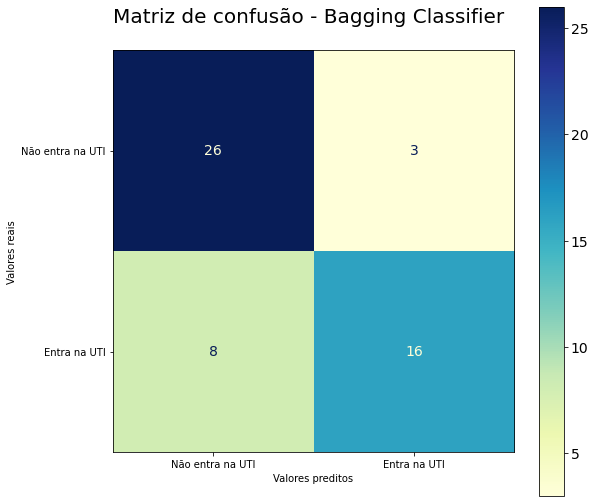

In [9]:
f.grafico_matriz_confusao(modelo_bagging,'Matriz de confusão - Bagging Classifier',dados)

Rodarei o modelo 50 vezes e verificarei qual é o seu AUC médio e em qual intervalo se encontra.

In [10]:
f.roda_n_modelos(modelo_bagging,dados,50)

AUC médio 0.7514798850574713
Intervalo 0.6289125908452037 - 0.874047179269739


Este modelo não apresentou um resultado interessante, principalmente em relação ao menor índice de recall. 

O que demonstra que ele não está prevendo corretamente a entrada na UTI dos pacientes. 

#### <font color= MediumSpringGreen> 1.1.2  GradientBoostingClassifier


Farei as mesmas etapas para os os próximos dois algoritmos.


In [11]:
modelo_gradient_boosting = GradientBoostingClassifier()

In [12]:
f.roda_modelo(modelo_gradient_boosting,dados)

AUC 0.8678160919540231

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.83      0.79      0.81        24

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



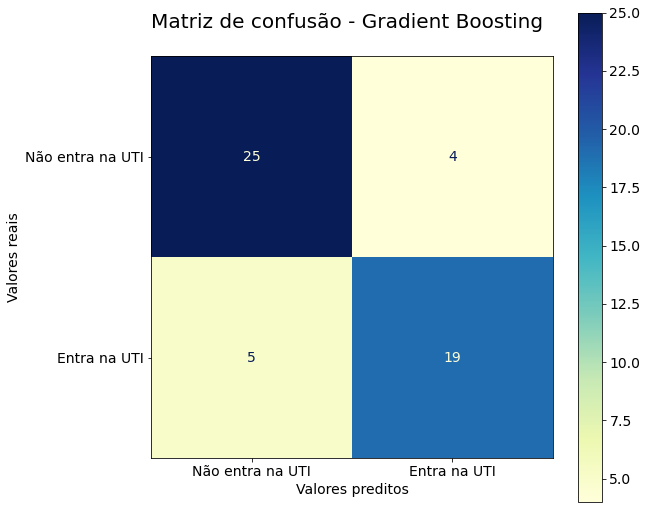

In [13]:
f.grafico_matriz_confusao(modelo_gradient_boosting,'Matriz de confusão - Gradient Boosting',dados)

In [14]:
f.roda_n_modelos(modelo_gradient_boosting,dados,50)

AUC médio 0.7935344827586208
Intervalo 0.6784164414715169 - 0.9086525240457247


No geral este modelo já apresentou resultados melhores do que o anterior. 

#### <font color= MediumSpringGreen> 1.1.3  RandomForestClassifier


Seguirei com as etapas já aplicadas nos modelos anteriores.

In [15]:
modelo_random_forest = RandomForestClassifier()

In [16]:
f.roda_modelo(modelo_random_forest,dados)

AUC 0.889367816091954

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.86      0.75      0.80        24

    accuracy                           0.83        53
   macro avg       0.83      0.82      0.83        53
weighted avg       0.83      0.83      0.83        53



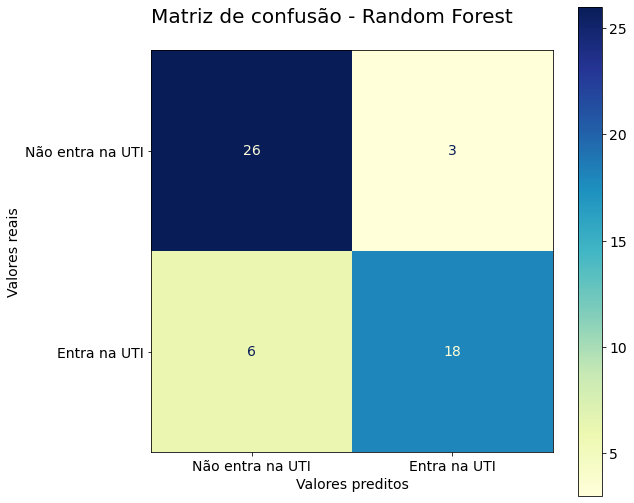

In [17]:
f.grafico_matriz_confusao(modelo_random_forest,'Matriz de confusão - Random Forest',dados)

In [18]:
f.roda_n_modelos(modelo_random_forest,dados,50)

AUC médio 0.799353448275862
Intervalo 0.679210924769189 - 0.919495971782535


O Random Forest também teve resultados bons. 

Para a segunda parte, irei otimizar os parâmetros para que tenham resultados melhores.
Tanto para o Random forest, quanto para o Gradient Boosting eu irei otimizar com os melhores parâmetros.

### <font color= MediumSpringGreen> 1.2 Otimização de hiperparâmetros

Irei realizar a otimização dos hiperparametros dos dois modelos que tiveram maior AUC médio, para verficar qual teve o melhor AUC e recall de acordo com a previsão de entrada na UTI.



Utilizarei a otimização Bayesiana para encontrar os melhores hiperparâmetros.

#### <font color= MediumSpringGreen> 1.2.1 Gradient Boosting Classifier


Listarei a faixa de cada hiperparâmetro a ser verificado pelo algoritmo.

In [19]:
params_gradient_boosting_classifier = {
    'n_estimators': (10,1000),
    'learning_rate': (0.0001,1.0),
    'max_depth': (2,10),
    'subsample': (0.1, 1.0)
    }

Passarei essa função que irá me devolver quais são os melhores hiperparâmetros.

In [20]:
f.otimizar_param_bayesiano(modelo_gradient_boosting,params_gradient_boosting_classifier,dados)

OrderedDict([('learning_rate', 0.18897551641625762),
             ('max_depth', 5),
             ('n_estimators', 854),
             ('subsample', 0.5407582324959316)])

Treinarei o modelo com os melhores hiperparâmetros.

In [21]:
modelo_gbc_otimizado = GradientBoostingClassifier(n_estimators=854,learning_rate=0.18897551641625762,max_depth=5,subsample=0.5407582324959316)

Farei os testes novamente.


In [22]:
f.roda_modelo(modelo_gbc_otimizado,dados)

AUC 0.8419540229885056

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.83      0.79      0.81        24

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



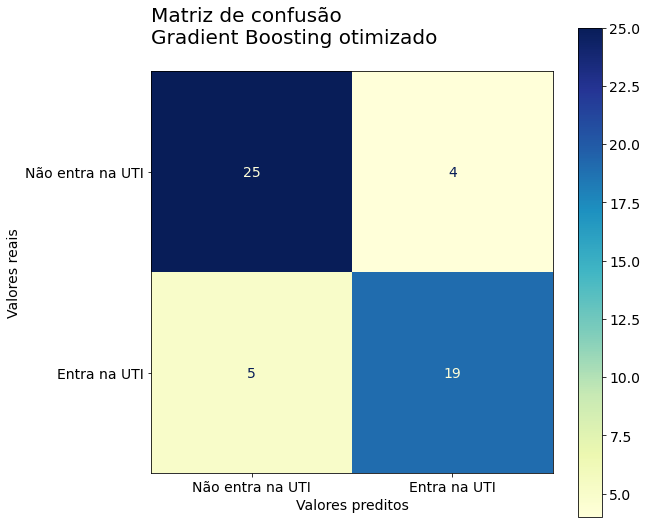

In [23]:
f.grafico_matriz_confusao(modelo_gbc_otimizado,'Matriz de confusão'+'\n'+'Gradient Boosting otimizado',dados)

In [24]:
f.roda_n_modelos(modelo_gbc_otimizado,dados,50)

AUC médio 0.7941666666666666
Intervalo 0.6873693298146948 - 0.9009640035186384


#### <font color= MediumSpringGreen> 1.2.2 Ramdom Forest


Listarei a faixa de cada hiperparâmetro a ser verificado pelo algoritmo.

In [25]:
params_random_forest = {
    'n_estimators': (10,1000),
    'min_samples_split': (2,10),
    'max_depth': (2,10)
    }

Passarei essa função que irá me devolver quais são os melhores hiperparâmetros.

In [26]:
f.otimizar_param_bayesiano(modelo_random_forest,params_random_forest,dados)

OrderedDict([('max_depth', 10),
             ('min_samples_split', 10),
             ('n_estimators', 156)])

Treinarei o modelo com os melhores hiperparâmetros.

In [27]:
modelo_rf_otimizado = RandomForestClassifier(n_estimators=156,
                                             min_samples_split=10,
                                             max_depth=10)

Farei os testes novamente.




In [28]:
f.roda_modelo(modelo_rf_otimizado,dados)

AUC 0.9094827586206896

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.83      0.79      0.81        24

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



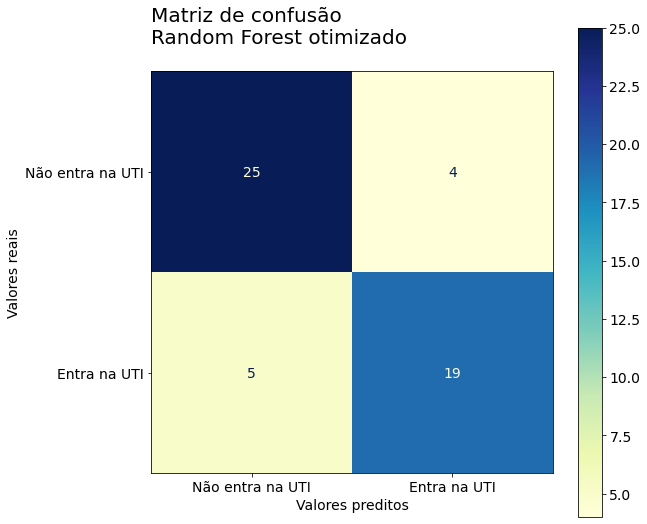

In [29]:
f.grafico_matriz_confusao(modelo_rf_otimizado,'Matriz de confusão'+'\n'+'Random Forest otimizado',dados)

In [30]:
f.roda_n_modelos(modelo_rf_otimizado,dados,50)

AUC médio 0.7902586206896552
Intervalo 0.6692703611857989 - 0.9112468801935116


## <font color= MediumSpringGreen> 2. Salvando o modelo


Com o modelo treinado e testado irei salvar ele para que não haja a necessidade de repasasar novamente pelo treinamento. 

Escolhi o modelo otimizado do Gradient Boosting devido seu melhor desempenho médio da métrica AUC, levando a uma maior probabilidade de resultados corretos com o modelo.

In [31]:
dump(modelo_gbc_otimizado, 'UTI_GradientBosting_preditor.joblib') 

['UTI_GradientBosting_preditor.joblib']

In [32]:
UTI_GradientBosting_preditor = load('UTI_GradientBosting_preditor.joblib') 


In [33]:
f.roda_modelo(UTI_GradientBosting_preditor,dados)

AUC 0.8419540229885056

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.83      0.79      0.81        24

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



## <font color= MediumSpringGreen> 3. Considerações finais




Devido as características do conjunto de dados iniciais, foi realizada diversas etapas na **limpeza e modelagem dos dados**:

1. Excluiu os pacientes que já entraram nas duas primeiras horas na UTI, devido a incerteza se foi coletado os dados antes ou depois da entrada.
2. Foi preenchido os dados faltantes do conjunto a partir do dado anterior e posterior a ele.
3. Verifiquei se o paciente iria para a UTI ou não até a sua última janela e coloquei a informação na linha da primeira janela (0-2). Exclui as linhas com as demais janelas, para que pudesse prever com os resultados a partir das primeiras horas.
4. Trasnformei a variável "AGE_PERCENTIL" em dados categóricos, afim de se tornar uma variável para o modelo.
5. Exclui as variáveis com alta correlação entre elas, para que o modelo não sofra sobreajuste (overfitting).
6. Mantive o gênero dos pacientes, pois de acordo com as literaturas citadas [[1](https://doi.org/10.1038/s41467-020-19741-6),[2](https://doi.org/10.1371/journal.pone.0237297)] há uma diferença entre os gêneros nas complicações da doença.
7. Exclui as colunas que possuaim valores únicos (apenas 1, no qual foram as medidas "DIFF" das variáveis) em todas as linhas, para que pudesse ter um conjunto de dados mais limpo possível para o modelo.

Na **análise exploratória** foi possível entender melhor as variáveis e o quadro geral:

1. O total de pacientes do conjunto foi de 353.
2. Desses 190 (54%) não tiveram entrada e 163 (46%) tiveram.
3. Pacientes acima de 65 anos de idade tem uma maior frequência de entrada na UTI.
4. Ao visualizar todas as faixas etárias, foi possível confirmar que a partir da faixa de 61-70 anos frequência se iguala e a partir dos 70 anos a entrada na UTI é maior.
5. Também pude confirmar a questão da entrada na UTI através do gênero, no qual os homens tem maior incidência de complicações na doença.
6. Analisei em conjunto todas as doenças anteriores dos pacientes, para pudesse entender ao todo como cada pessoa com estas características se comportaria na entrada ou não na UTI. A maior frequência está em pacientes que não tiveram nenhuma outra doença mas se concentrou em outras doenças. Talvez se esta variável estivesse mais detalhada em outras classificações, poderíamos ter um modelo mais assertivo do ponto de vista das doenças anteriores.
7. Dentre os indicadores sanguíneos, observei os que tiveram maior diferença (positiva e negativa), entre as pessoas que entraram ou não na UTI foram: 
  * Negativa:
    * Sódio
    * Hematócritos
    * Linfóciotos
    * BIC Venoso
    * PH Venoso
  * Positiva:
    * Lactato
    * PCR
    * SAT02 Venoso
    * Cálcio
    * Potássio
8. Já nos sinais vitais os dois indicadores que tiveram maior diferença foram o de temperatura (-35%) e D-Dímero (22%) dos pacientes que não entraram na UTI.

Durante o **desenvolvimento do modelo**, escolhi algumas etapas para definir o melhor:

1. Baseado no [artigo científico](https://doi.org/10.1038/s41746-021-00456-x) citado, escolhi 3 modelos que tiveram maior índice de F1 para realizar os testes do conjunto de dados:
  * Bagging Classifier
  * Gradient Boosting Classifier
  * Ramdom Florest
2. Realizei os testes com cada um deles, visualizando as métricas de AUC, a tabela de precision, recall e f1-score, a matriz de confusão do teste e o AUC médio do intervalo de AUC coletado, ao rodar ele 50 vezes.
3. A partir desse etapa, escolhi os dois modelos que tiveram melhor desempenho de AUC médio e Reccal no caso de entrada na UTI (pois é uma medida muito importante para que o modelo não errasse em pessoas que deveriam entrar na UTI e o modelo indicasse que ela não precisaria).
4. Otimizei os hiperparâmetros do modelo com uma abordagem Bayesiana, procurando os melhores parâmetros. 
5. Realizei os testes das métricas novamente.
6. Os resultados mostraram o Gradient Boosting otimizado com um melhor resultado de AUC médio (0.794) dentre o intervalo, além dele ter tido um reccal em pessoas que deveriam entrar na UTI de 0.79.


Foi um modelo definido com uma métrica média não muito alta, mas ele poderá ser uma importante ferramenta para os profissionais da saúde poderem já se alertarem aos primeiros sinais dos pacientes ao entrarem no hospital.

Comos próximos passos seria legal que ele estivesse fazendo parte de um sistema integrado as ferramentas dos profissionais da saúde, mostrando a estimativa do modelo.

## <font color= MediumSpringGreen> Referências

IACCARINO, G. et al. Gender differences in predictors of intensive care units admission among COVID-19 patients: The results of the SARS-RAS study of the Italian Society of Hypertension. **PloS one**, v. 15(10), oct. 2020. DOI https://doi.org/10.1371/journal.pone.0237297 . Disponível em: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0237297 . Acesso em: 25 jan. 2022.

PECKHAM, H. et al. Male sex identified by global COVID-19 meta-analysis as a risk factor for death and ITU admission. **Nature Communications**, v. 11(6317), dec. 2020. DOI: https://doi.org/10.1038/s41467-020-19741-6 . Disponível em: https://www.nature.com/articles/s41467-020-19741-6#citeas . Acesso em: 25 jan. 2022.

SUBUDHI, S. et al. Comparing machine learning algorithms for predicting ICU admission and mortality in COVID-19. **NPJ Digit**. Med. 4, v. 87, may 2021. DOI: https://doi.org/10.1038/s41746-021-00456-x . Disponível em: https://www.nature.com/articles/s41746-021-00456-x#citeas . Acesso em: 29 jan. 2022

